# Machine Learning Seminar
### Chapter08. Dimensionality Reduction
<br>
19.09.19  


JaeEun Yoo


* Many Machine Learning problems involve thousands or even millions of features for each training instance. 
    * Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. 
    * This problem is often referred to as the **curse of dimensionality.**
* Fortunately, in real-world problems, it is often possible **to reduce the number of features considerably**, turning an intractable problem into a tractable one. 
    * For example, consider the MNIST images (introduced in Chapter 3): 
    * the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. 

![Figure 6-2](./img/08_01.PNG)

* Figure 7-6 confirms that these pixels are utterly unimportant for the classification task. 
* Moreover, two neighboring pixels are often highly correlated: 
    * if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information.
* Apart from speeding up training, dimensionality reduction is also extremely useful for **data visualization (or DataViz)**. 
* Reducing the number of dimensions down to two (or three) makes it possible to **plot a high-dimensional training set on a graph** and often gain some important insights by visually detecting patterns, such as **clusters.**

* In this chapter we will discuss the curse of dimensionality and get a sense of what goes on in highdimensional space. 
* Then, we will present the two main approaches to dimensionality reduction (projection and Manifold Learning), and we will go through three of the most popular dimensionality reduction techniques: <u>PCA, Kernel PCA, and LLE.</u>

> **WARNING**

* Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will **speed up** training, it may also make **your system perform slightly worse.** 
* It also makes your <u>pipelines a bit more complex</u> and thus <u>harder to maintain.</u> 
* So you should first **try to train your system with the original data before considering using dimensionality reduction** if training is too slow. 
    * In some cases, however, reducing the dimensionality of the training data may **filter out some noise and unnecessary details** and thus result in higher performance (but in general it won’t; it will just speed up training).

<hr>

## The Curse of Dimensionality

* We are so used to living in three dimensions that our intuition fails us when we try to imagine a highdimensional space. 
    * Even a basic 4D hypercube is incredibly hard to picture in our mind (see Figure 8-1), let alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.

![Figure 6-2](./img/08_02.PNG)

* It turns out that many things behave very differently in high-dimensional space. 
    * For example, if you pick a random point in a **unit square (a 1 × 1 square)**, it will have only about a <u>0.4% chance of being located less than 0.001 from a border</u> (in other words, it is very unlikely that a random point will be “extreme” along any dimension). 
    * But in a **10,000-dimensional unit hypercube** (a 1 × 1 × ⋯ × 1 cube, 
    with ten thousand 1s), this probability is greater than <u>99.999999%.</u> 
* Most points in a high-dimensional hypercube are very close to the border.

* Here is a more troublesome difference: 
    * if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly **0.52**. 
    * If you pick two random points in a unit 3D cube, the average distance will be roughly **0.66**. 
    * But what about two points picked randomly in a 1,000,000-dimensional hypercube? 
* Well, the average distance, believe it or not, will be about **408.25**(roughly ![Figure 6-2](./img/08_03.PNG)! 
* This is quite counterintuitive: how can two points be so far apart when they both lie within the same unit hypercube? 
    * **This fact implies that high-dimensional datasets are at risk of being very sparse:**
    * most training instances are likely to be far away from each other. 
    * Of course, this also means that a new instance will likely be far away from any training instance, **making predictions much less reliable than in lower dimensions,** since they will be based on much larger extrapolations. 
    * extrapolations : 보외법, 원래의 관찰 범위를 넘어서서 다른 변수와의 관게에 기초하여 변수의 값을 추정하는 과정.
* In short, **the more dimensions the training set has, the greater the risk of overfitting it.**


* In theory, one solution to the curse of dimensionality could be to **increase the size of the training set to reach a sufficient density of training instances.** 
* Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions. 
* With just 100 features (much less than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions.

<hr>

## Main Approaches for Dimensionality Reduction  
Before we dive into specific dimensionality reduction algorithms, let’s take a look at the <u>two main approaches to reducing dimensionality</u>: **projection and Manifold Learning.**

### Projection

* In most real-world problems, training instances are not spread out uniformly across all dimensions.
* Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). 
* As a result, **all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.**  
* This sounds very abstract, so let’s look at an example. In Figure 8-2 you can see a 3D dataset represented by the circles.

![Figure 6-2](./img/08_04.PNG)

* Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. 
* Now if we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3. Ta-da! 

![Figure 6-2](./img/08_05.PNG)

* We have just reduced the dataset’s dimensionality from 3D to 2D.
* Note that **the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).**

* However, projection is not always the best approach to dimensionality reduction. 
* In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset represented in Figure 8-4.

![Figure 6-2](./img/08_06.PNG)

* Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of the Swiss roll together, as shown on the left of Figure 8-5. 
* However, what you really want is to unroll the Swiss roll to obtain the 2D dataset on the right of Figure 8-5.

![Figure 6-2](./img/08_07.PNG)

<br>

### Manifold Learning

* The Swiss roll is an example of a 2D manifold. 
    * Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. 
    * More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. 
* In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.
* Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called **Manifold Learning.** 
* It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. 
* This assumption is very often empirically observed.

* Once again, think about the MNIST dataset: all handwritten digit images have some similarities. 
    * They are made of connected lines, the borders are white, they are more or less centered, and so on. 
    * If you randomly generated images, only a ridiculously tiny fraction of them would look like handwritten digits. 
    * In other words, <u>the degrees of freedom available to you if you try to create a digit image are dramatically lower than the degrees of freedom you would have if you were allowed to generate any image you wanted.</u> 
    * These constraints tend to squeeze the dataset into a lower-dimensional manifold.
* The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. 

![Figure 6-2](./img/08_08.PNG)

* For example, in the top row of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a simple straight line.

* However, this assumption does not always hold. 
    * For example, in the bottom row of Figure 8-6, the decision boundary is located at x<sub>1</sub> = 5. 
    * This decision boundary looks very simple in the original 3D space (a vertical plane), but **it looks more complex in the unrolled manifold** (a collection of four independent line segments).
* In short, if you reduce the dimensionality of your training set before training a model, it will definitely speed up training, but it may not always lead to a better or simpler solution; <u>it all depends on the dataset.</u>
* Hopefully you now have a good sense of what the curse of dimensionality is and how dimensionality reduction algorithms can fight it, especially when the manifold assumption holds. 
* The rest of this chapter will go through some of the most popular algorithms.

<hr>

## PCA (Principal Component Analysis)

* Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.
* First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

### Preserving the Variance

* Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. 
    * For example, a simple 2D dataset is represented on the left of Figure 8-7, along with three different axes (i.e., one-dimensional hyperplanes). 
    * On the right is the result of the projection of the dataset onto each of these axes. 


![Figure 6-2](./img/08_09.PNG)

* As you can see, the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance, and the projection onto the dashed line preserves an intermediate amount of variance.

* It seems reasonable to select the axis that **preserves the maximum amount of variance**, as it will <u>most likely lose less information than the other projections</u>. 
* Another way to justify this choice is that it is the axis that <u>minimizes the mean squared distance between the original dataset and its projection onto that axis.</u>
* This is the rather simple idea behind PCA.

### Principal Components

![Figure 6-2](./img/08_09.PNG)

* PCA identifies the axis that accounts for the largest amount of variance in the training set. In Figure 8-7, it is the **solid line.** 
* It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. 
* In this 2D example there is no choice: it is the dotted line. 
* If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on — as many axes as the number of dimensions in the dataset.
* The unit vector that defines the i<sub>th</sub> axis is called the **i<sub>th</sub> principal component (PC).** 
* In Figure 8-7, the 1st PC is c<sub>1</sub> and the 2nd PC is c<sub>2</sub>. 

![Figure 6-2](./img/08_04.PNG)

* In Figure 8-2 the first two PCs are represented by the orthogonal arrows in the plane, and the third PC would be orthogonal to the plane (pointing up or down).

> **NOTE**

**The direction of the principal components is not stable**: if you perturb the training set slightly and run PCA again, <u>some of the new PCs may point in the opposite direction of the original PCs.</u> However, they will generally still lie on the same axes.  
In some cases, a pair of PCs may even rotate or swap, but the plane they define will generally remain the same.

* So how can you find the principal components of a training set? Luckily, there is a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix **X** into the dot product of three matrices **U · Σ · V<sup>T</sup>**, where **V<sup>T</sup>** contains all the principal components that we are looking for, as shown in Equation 8-1.

![Figure 6-2](./img/08_10.PNG)

![Figure 6-2](./img/08_15.PNG)

![Figure 6-2](./img/08_16.PNG)

reference : http://darkpgmr.tistory.com/106

* The following Python code uses NumPy’s ***svd()*** function to obtain all the principal components of the training set, then extracts the first two PCs:

In [71]:
import numpy as np

A = [[i**2, i, 1] for i in range(1930, 2020, 10)]
matA = np.array(A).astype(np.float64)

In [72]:
matA

array([[3.7249e+06, 1.9300e+03, 1.0000e+00],
       [3.7636e+06, 1.9400e+03, 1.0000e+00],
       [3.8025e+06, 1.9500e+03, 1.0000e+00],
       [3.8416e+06, 1.9600e+03, 1.0000e+00],
       [3.8809e+06, 1.9700e+03, 1.0000e+00],
       [3.9204e+06, 1.9800e+03, 1.0000e+00],
       [3.9601e+06, 1.9900e+03, 1.0000e+00],
       [4.0000e+06, 2.0000e+03, 1.0000e+00],
       [4.0401e+06, 2.0100e+03, 1.0000e+00]])

In [73]:
X_centered = matA - matA.mean(axis=0)

In [74]:
X_centered

array([[-1.56666667e+05, -4.00000000e+01,  0.00000000e+00],
       [-1.17966667e+05, -3.00000000e+01,  0.00000000e+00],
       [-7.90666667e+04, -2.00000000e+01,  0.00000000e+00],
       [-3.99666667e+04, -1.00000000e+01,  0.00000000e+00],
       [-6.66666667e+02,  0.00000000e+00,  0.00000000e+00],
       [ 3.88333333e+04,  1.00000000e+01,  0.00000000e+00],
       [ 7.85333333e+04,  2.00000000e+01,  0.00000000e+00],
       [ 1.18433333e+05,  3.00000000e+01,  0.00000000e+00],
       [ 1.58533333e+05,  4.00000000e+01,  0.00000000e+00]])

In [75]:
U,s,V = np.linalg.svd(X_centered)

In [76]:
U

array([[-0.5133311 ,  0.53477671, -0.03641862,  0.20799157,  0.34800135,
         0.38361073,  0.31481971,  0.14162827, -0.13596357],
       [-0.3865274 ,  0.13517892, -0.2513109 , -0.31529261, -0.29174947,
        -0.18068149,  0.01791133,  0.30402898,  0.67767148],
       [-0.25906838, -0.15046018,  0.93527962, -0.05342831, -0.03241249,
        -0.00167292,  0.03879039,  0.08897745,  0.14888826],
       [-0.13095404, -0.32214059, -0.09218599,  0.88245861, -0.10992061,
        -0.06932365,  0.0042495 ,  0.11079883,  0.25032435],
       [-0.00218439, -0.37986231, -0.09203969, -0.13973421,  0.85582405,
        -0.1053649 , -0.02330106,  0.10201555,  0.27058495],
       [ 0.12724058, -0.32362533, -0.06428148, -0.12000677, -0.1351785 ,
         0.89020332, -0.04386131,  0.0626276 ,  0.20967007],
       [ 0.25732087, -0.15342966, -0.00891137, -0.05835906, -0.08292827,
        -0.08261899,  0.94256876, -0.00736501,  0.0675797 ],
       [ 0.38805647,  0.1307247 ,  0.07407065,  0.04520891,  0

In [77]:
# eigenvalue of matA
s

array([3.05196143e+05, 4.45422285e-01, 0.00000000e+00])

In [79]:
V

array([[ 9.99999968e-01,  2.53798706e-04,  0.00000000e+00],
       [ 2.53798706e-04, -9.99999968e-01, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [80]:
c1 = V.T[:,0]
c2 = V.T[:,1]

In [81]:
c1

array([9.99999968e-01, 2.53798706e-04, 0.00000000e+00])

In [82]:
c2

array([ 2.53798706e-04, -9.99999968e-01, -0.00000000e+00])

> **WARNING**

PCA assumes that **the dataset is centered around the origin.** As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first.

<br>

### Projecting Down to d Dimensions

* Once you have identified all the principal components, you can <u>reduce the dimensionality of the dataset</u> down to ***d* dimensions by projecting it onto the hyperplane defined by the first *d* principal components.** 
* Selecting this hyperplane ensures that the projection will preserve as much variance as possible. 
    * For example, in Figure 8-2 the 3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance. 
    * As a result, the 2D projection looks very much like the original 3D dataset.

![Figure 6-2](./img/08_04.PNG)

* To project the training set onto the hyperplane, you can simply compute the dot product of the training set matrix **X** by the matrix **W<sub>d</sub>**, defined as the matrix containing the first d principal components (i.e., the matrix composed of the first *d* columns of **V<sup>T</sup>**), as shown in Equation 8-2.

![Figure 6-2](./img/08_11.PNG)

The following Python code projects the training set onto the plane defined by the first two principal
components:

In [83]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

In [84]:
X2D

array([[-1.56666672e+05,  2.38201465e-01],
       [-1.17966670e+05,  6.02117031e-02],
       [-7.90666692e+04, -6.70183182e-02],
       [-3.99666679e+04, -1.43488598e-01],
       [-6.66666645e+02, -1.69199137e-01],
       [ 3.88333346e+04, -1.44149935e-01],
       [ 7.85333359e+04, -6.83409916e-02],
       [ 1.18433337e+05,  5.82276930e-02],
       [ 1.58533338e+05,  2.35556119e-01]])

There you have it! You now know how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible.

<br>

### Using Scikit-Learn

* Scikit-Learn’s *PCA* class implements PCA using SVD decomposition just like we did before. 
* The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data):

In [14]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(matA)

In [86]:
matA

array([[3.7249e+06, 1.9300e+03, 1.0000e+00],
       [3.7636e+06, 1.9400e+03, 1.0000e+00],
       [3.8025e+06, 1.9500e+03, 1.0000e+00],
       [3.8416e+06, 1.9600e+03, 1.0000e+00],
       [3.8809e+06, 1.9700e+03, 1.0000e+00],
       [3.9204e+06, 1.9800e+03, 1.0000e+00],
       [3.9601e+06, 1.9900e+03, 1.0000e+00],
       [4.0000e+06, 2.0000e+03, 1.0000e+00],
       [4.0401e+06, 2.0100e+03, 1.0000e+00]])

In [88]:
X2D

array([[-1.56666672e+05,  2.38201465e-01],
       [-1.17966670e+05,  6.02117031e-02],
       [-7.90666692e+04, -6.70183182e-02],
       [-3.99666679e+04, -1.43488598e-01],
       [-6.66666645e+02, -1.69199137e-01],
       [ 3.88333346e+04, -1.44149935e-01],
       [ 7.85333359e+04, -6.83409916e-02],
       [ 1.18433337e+05,  5.82276930e-02],
       [ 1.58533338e+05,  2.35556119e-01]])

* After fitting the PCA transformer to the dataset, you can access the principal components using the *components_* variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to *pca.components_.T[:, 0]*).

<br>

### Explained Variance Ratio

* Another very useful piece of information is the explained variance ratio of each principal component, available via the *explained_variance_ratio_ variable.* 
* It indicates the proportion of the dataset’s variance that lies along the axis of each principal component. 
* For example, let’s look at the explained variance ratios of the first two components of the 3D dataset represented in Figure 8-2:

![Figure 6-2](./img/08_04.PNG)

In [91]:
print(pca.explained_variance_ratio_[1])

2.1300303957016196e-12


* This tells you that 100% of the dataset’s variance lies along the first axis, and 0.000...2% lies along the second axis. 
* This leaves less than 1.2% for the third axis, so it is reasonable to assume that it probably carries little information.

<br>

### Choosing the Right Number of Dimensions

* Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to **choose the number of dimensions that add up to a sufficiently large portion of the variance** (e.g., 95%). 
* Unless, of course, you are reducing dimensionality for data visualization — in that case you will generally want to reduce the dimensionality down to **2 or 3.**
* The following code <u>computes PCA without reducing dimensionality,</u> then **computes the minimum number of dimensions required to preserve 95% of the training set’s variance:**

In [26]:
pca= PCA()
pca.fit(matA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**numpy.cumsum**  
Return the cumulative sum of the elements along a given axis.

In [27]:
pca.explained_variance_ratio_

array([1.0000000e+00, 2.1300304e-12, 0.0000000e+00])

In [29]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(np.argmax(cumsum >= 0.95))
d = np.argmax(cumsum >= 0.95) +1

0


In [30]:
d

1

* You could then set *n_components=d* and run PCA again. 
* However, there is a much better option:
    * instead of specifying the number of principal components you want to preserve, you can set *n_components* to be a float between **0.0 and 1.0**, indicating the ratio of variance you wish to preserve:

In [31]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(matA)

In [32]:
X_reduced

array([[-156666.67177287],
       [-117966.67048129],
       [ -79066.66919615],
       [ -39966.66791745],
       [   -666.6666452 ],
       [  38833.33462062],
       [  78533.33587999],
       [ 118433.33713293],
       [ 158533.33837942]])

In [33]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(matA)

In [34]:
X_reduced

array([[-156666.67177287],
       [-117966.67048129],
       [ -79066.66919615],
       [ -39966.66791745],
       [   -666.6666452 ],
       [  38833.33462062],
       [  78533.33587999],
       [ 118433.33713293],
       [ 158533.33837942]])

![Figure 6-2](./img/08_12.PNG)

* Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum; see Figure 8-8). 
* There will usually be an elbow in the curve, where the explained variance stops growing fast. 
* You can think of this as the intrinsic dimensionality of the dataset. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

<br>

### PCA for Compression

* Obviously after dimensionality reduction, the training set takes up much less space. 
    * For example, try applying PCA to the MNIST dataset while preserving 95% of its variance. 
    * You should find that each instance will have just over 150 features, instead of the original 784 features. 
* So <u>while most of the variance is preserved, the dataset is now less than 20% of its original size!</u> 
* This is a reasonable compression ratio, and you can see how this can speed up a classification algorithm (such as an SVM classifier) tremendously.
* It is also possible to decompress the reduced dataset **back to 784 dimensions by applying the inverse transformation of the PCA projection.** 
* Of course this won’t give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped), <u>but it will likely be quite close to the original data.</u> 
* The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called **the reconstruction error.**
    * For example, the following code compresses the MNIST dataset down to 154 dimensions, then uses the *inverse_transform()* method to decompress it back to 784 dimensions. 
    * Figure 8-9 shows a few digits from the original training set (on the left), and the corresponding digits after compression and decompression. 
    * You can see that there is a slight image quality loss, **but the digits are still mostly intact.**

In [35]:
from keras.datasets import mnist

Using TensorFlow backend.


In [36]:
(X, y_mnist), (X_test, y_test) = mnist.load_data()

In [37]:
X_mnist = X.reshape(-1, 28*28)
X_mnist.shape

(60000, 784)

In [38]:
pca = PCA(n_components=154)

In [39]:
X_mnist_reduces = pca.fit_transform(X_mnist)

In [40]:
X_mnist_reduces

array([[ 1.23932589e+02, -3.12674262e+02, -2.45140519e+01, ...,
        -2.90325797e+01,  1.48880978e+01,  2.78623778e+01],
       [ 1.01171838e+03, -2.94857038e+02,  5.96339561e+02, ...,
        -2.94593548e+01,  1.16299590e+01,  2.96166390e+01],
       [-5.18496081e+01,  3.92173153e+02, -1.88509749e+02, ...,
         3.85633109e+01, -7.45990727e+01, -1.03204927e+02],
       ...,
       [-1.78053450e+02,  1.60078211e+02, -2.57613082e+02, ...,
        -1.10195242e-01, -2.43054643e+01, -1.16322675e+01],
       [ 1.30606072e+02, -5.59193641e+00,  5.13858674e+02, ...,
         3.61727474e+01, -5.32494857e+01,  5.26154293e+01],
       [-1.73435952e+02, -2.47188023e+01,  5.56018894e+02, ...,
        -1.71339258e+01, -2.26387708e+01, -6.75121186e+00]])

In [41]:
X_mnist_reduces.shape

(60000, 154)

In [43]:
X_mnist_recovered = pca.inverse_transform(X_mnist_reduces)

In [44]:
X_mnist_recovered.shape

(60000, 784)

In [45]:
test = X_mnist_recovered[0].reshape(1,28,28)

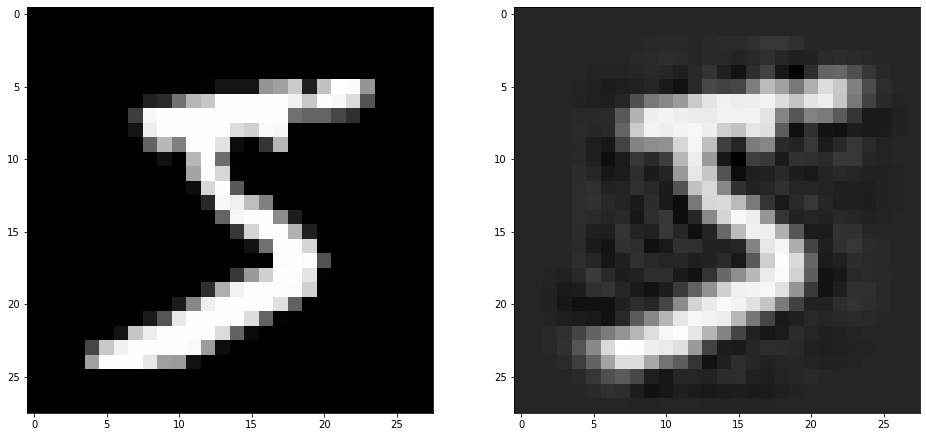

In [47]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.imshow(X[0],cmap='Greys_r') 
ax2.imshow(test[0],cmap='Greys_r')

![Figure 6-2](./img/08_13.PNG)

The equation of the inverse transformation is shown in Equation 8-3.

![Figure 6-2](./img/08_14.PNG)

<br>

### Incremental PCA

* One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the SVD algorithm to run. 
* Fortunately, **Incremental PCA (IPCA)** algorithms have been developed: you can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. 
* This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).
* The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s *array_split()* function) and feeds them to Scikit-Learn’s *IncrementalPCA* class to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before). 
* Note that you must call the *partial_fit()* method with each mini-batch rather than the *fit()* method with the whole training set:

In [48]:
from sklearn.decomposition import IncrementalPCA

In [49]:
n_batches=100
inc_pca = IncrementalPCA(n_components=154)

In [50]:
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

In [51]:
X_mnist_reduced = inc_pca.transform(X_mnist)

In [52]:
X_mnist_reduced.shape

(60000, 154)

* Alternatively, you can use NumPy’s *memmap* class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it. 
* Since the *IncrementalPCA* class uses only a small part of the array at any given time, the memory usage remains under control. 
* This makes it possible to call the usual *fit()* method, as you can see in the following code:

**np.memmap**  
Create a memory-map to an array stored in a binary file on disk.

In [55]:
X_bin = X_mnist.tobytes()

In [56]:
len(X_bin)

47040000

In [61]:
m = 60000
n = 786

In [62]:
X_mm = np.memmap(X_bin, dtype="float32", mode="readonly",shape=(m,n))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 157: invalid start byte

In [ ]:
batch_size = m//n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

<br>

### Randomized PCA

* Scikit-Learn offers yet another option to perform PCA, called *Randomized PCA*. 
* This is a stochastic algorithm that quickly finds an approximation of the first *d* principal components. 
* Its computational complexity is *O(m × d<sup>2</sup>) + O(d<sup>3</sup>)*, instead of *O(m × n<sup>2</sup>) + O(n<sup>3</sup>)*, so it is dramatically faster than the previous algorithms when *d* is much smaller than *n*.

In [67]:
pca = PCA(n_components=154)
X_mnist_reduces = pca.fit_transform(X_mnist)

In [68]:
X_mnist_reduced.shape

(60000, 154)

In [69]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)

In [70]:
X_reduced.shape

(60000, 154)